# DataAnalysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv('data_spaces.csv', delimiter=';')

print(data.head())

         Exam Set With AI Participant Task 1 Task 2 Task 3 Task 4 Task 5  \
0  Advertisements     Yes      Philip  107 1   91 1   69 1  114 1  146 1   
1          Robots      No      Philip    122    157     76    131    235   
2  Advertisements     Yes      Mattej  149 0  138 0  199 0  404 2  107 1   
3          Robots      No      Mattej    126     96     58    207    125   
4  Advertisements     Yes    Micheala  106 1    5 1   98 1  114 1   94 1   

  Task 6 Task 7 Task 8 Task 9  
0   58 1   96 1    NaN    NaN  
1     42    224    421      4  
2  330 0  338 0    NaN    NaN  
3     40    277    506    163  
4   54 1    NaN    NaN    NaN  


## Calculate time and prompts

In [2]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                prompt_str = parts[1]  # Binary indicator (prompt) is the second part
                total_prompt += int(prompt_str)
    return total_prompt

# Apply the functions to the dataset to calculate total time and prompt count for each row
data['Total_Time'] = data.iloc[:, 3:].apply(calculate_total_time, axis=1)
data['Total_Prompt_Count'] = data.iloc[:, 3:].apply(calculate_total_prompt, axis=1)

# Convert total time from seconds to minutes and round to the nearest whole number
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)


print(data.head())


         Exam Set With AI Participant Task 1 Task 2 Task 3 Task 4 Task 5  \
0  Advertisements     Yes      Philip  107 1   91 1   69 1  114 1  146 1   
1          Robots      No      Philip    122    157     76    131    235   
2  Advertisements     Yes      Mattej  149 0  138 0  199 0  404 2  107 1   
3          Robots      No      Mattej    126     96     58    207    125   
4  Advertisements     Yes    Micheala  106 1    5 1   98 1  114 1   94 1   

  Task 6 Task 7 Task 8 Task 9  Total_Time  Total_Prompt_Count  \
0   58 1   96 1    NaN    NaN         681                   7   
1     42    224    421      4        1412                   0   
2  330 0  338 0    NaN    NaN        1665                   3   
3     40    277    506    163        1598                   0   
4   54 1    NaN    NaN    NaN         471                   6   

   Total_Time_Minutes  
0                11.0  
1                24.0  
2                28.0  
3                27.0  
4                 8.0  


## Split data into four individual sets
### Sets for each exam set with and without AI

In [3]:
robots_with_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')]

robots_without_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')]

ads_with_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]

ads_without_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

## Box plot on total time spent of each exam set

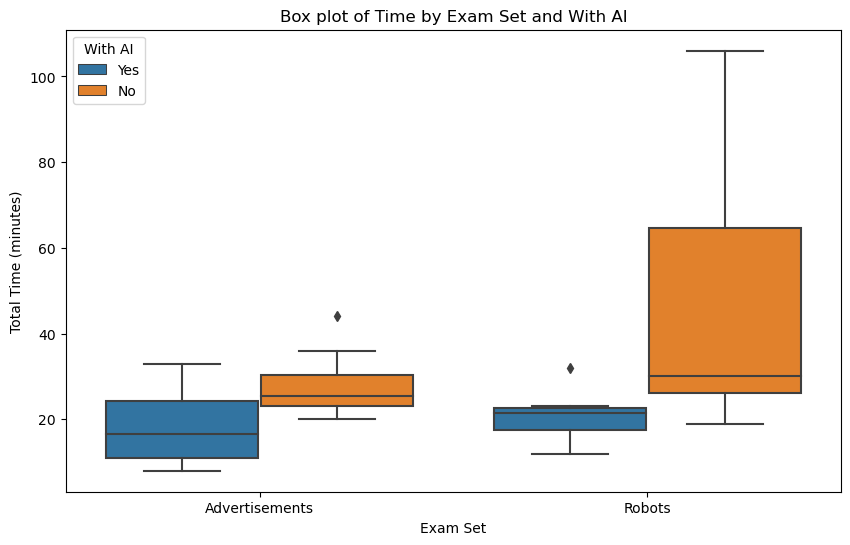

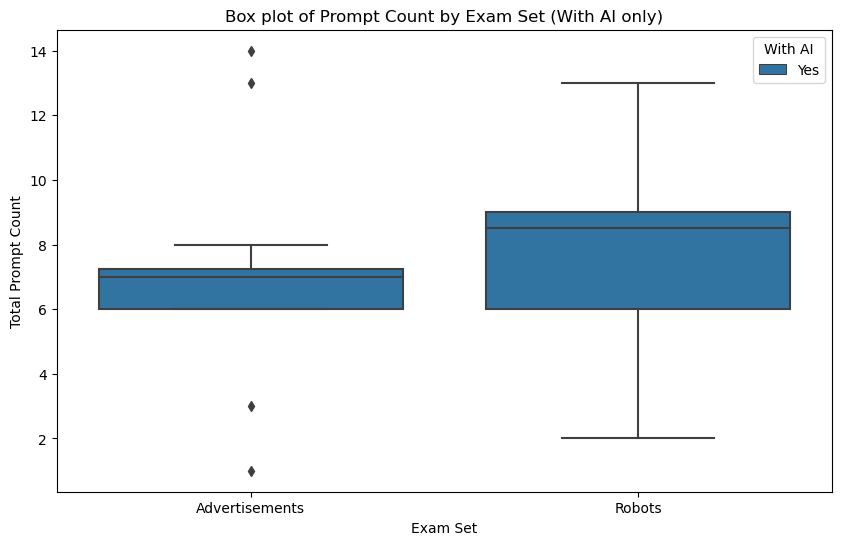

In [4]:
# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered)
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.show()

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', hue='With AI', data=data[data['With AI'] == 'Yes'])
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()



## Box plot on average time spent per task of each exam set

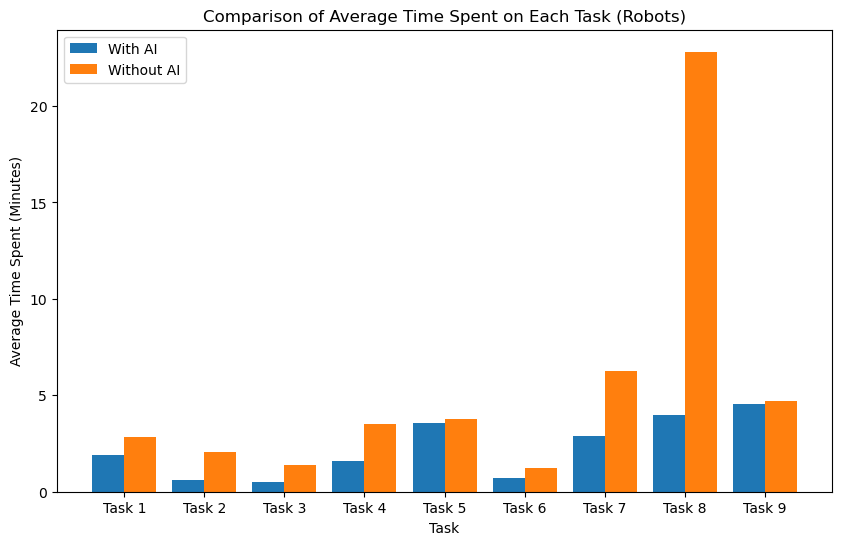

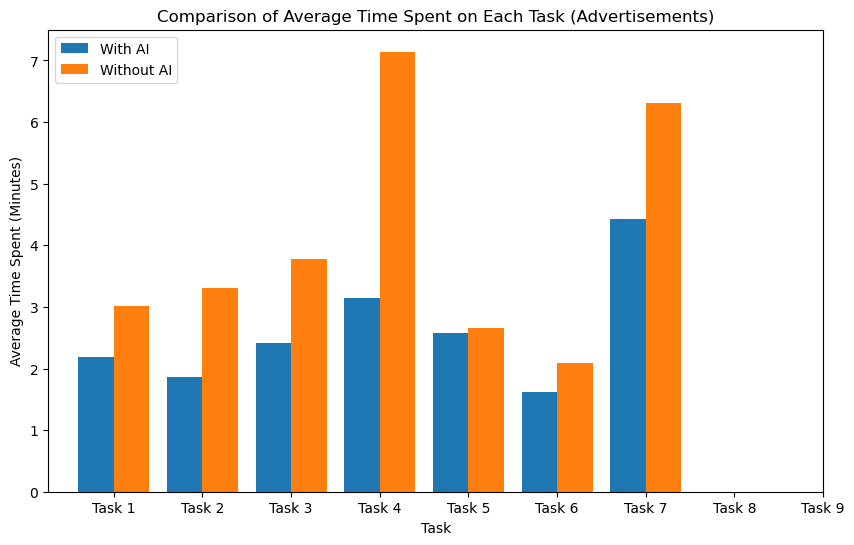

In [6]:
# Function to calculate average time spent per task
def calculate_average_time(task_series):
    total_time = 0
    count = 0
    for task in task_series:
        if pd.isna(task):  # Skip NaN values
            continue
        parts = task.split(' ')
        if len(parts) == 2:
            time_str = parts[0]
        else:
            time_str = task
        total_time += int(time_str)
        count += 1
    if count == 0:
        return np.nan  # Avoid division by zero
    return total_time / count / 60  # Convert to minutes

# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Extract task names
task_names = [f'Task {i}' for i in range(1, 10)]

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_ads, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_ads, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

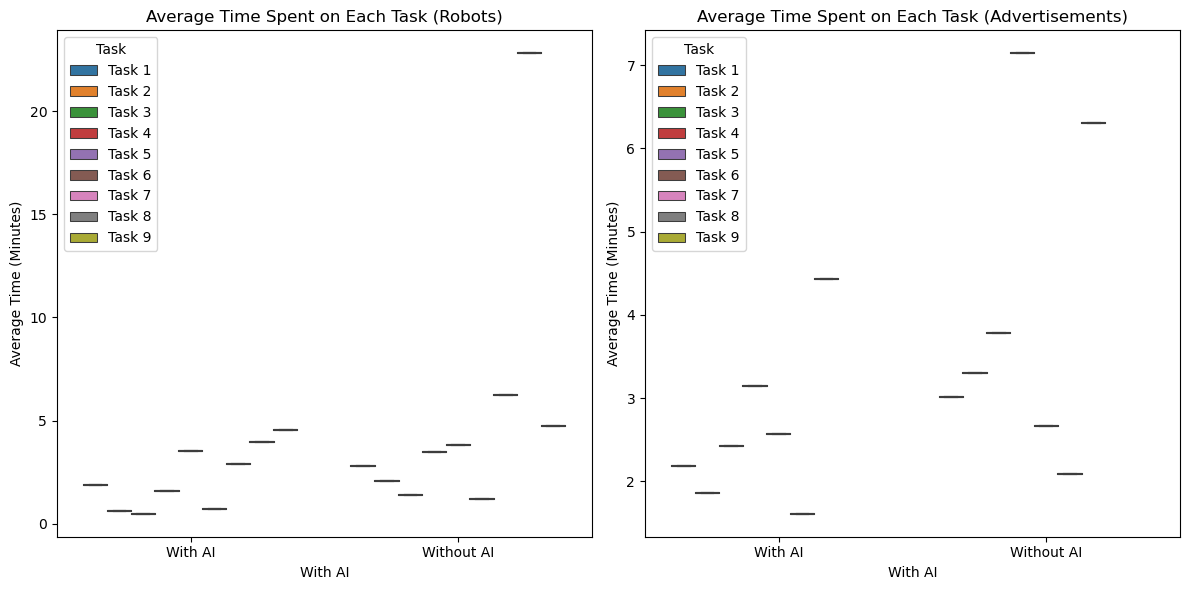

In [7]:
# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Convert the data to long format for plotting
avg_time_robots = pd.concat([avg_time_with_ai_robots, avg_time_without_ai_robots], axis=1)
avg_time_robots.columns = ['With AI', 'Without AI']
avg_time_robots['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_robots = avg_time_robots.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

avg_time_ads = pd.concat([avg_time_with_ai_ads, avg_time_without_ai_ads], axis=1)
avg_time_ads.columns = ['With AI', 'Without AI']
avg_time_ads['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_ads = avg_time_ads.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

# Create box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_robots)
plt.title('Average Time Spent on Each Task (Robots)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.subplot(1, 2, 2)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_ads)
plt.title('Average Time Spent on Each Task (Advertisements)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.tight_layout()
plt.show()

## Compare total time spend between the use of AI on exam sets

In [8]:
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 547.0 minutes
Total time spent on Robots with AI: 203.0 minutes
Total time used on tasks without AI in Robots are 169.46 % longer than with AI

Total time spent on Advertisements without AI: 276.0 minutes
Total time spent on Advertisements with AI: 215.0 minutes
Total time used on tasks without AI in Advertisements are 28.37 % longer than with AI


The Robots tasks show a much larger difference in time spent with versus without AI (81.92% longer without AI) compared to the Advertisements tasks (15.81% longer without AI). This substantial difference in the Robots category likely contributes to a lower P-value, indicating a statistically significant difference when AI is used.

## Statistically significan analysis

In [9]:
# For robots with AI
times_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_robots, times_without_ai_robots)

print(f"T-statistic for exam set with Robots: {t_stat}, P-value: {p_value}")

# For robots with AI
times_with_ai_adv = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_adv = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_adv, times_without_ai_adv)

print(f"T-statistic for exam set with Advertisements: {t_stat}, P-value: {p_value}")


T-statistic for exam set with Robots: -2.6179481823656108, P-value: 0.01647410626113095
T-statistic for exam set with Advertisements: -2.8455292197444924, P-value: 0.00999579164151388


### Robots Exam Set
* T-statistic: -2.618
* P-value: 0.0165

The negative T-statistic suggests that participants completed tasks in the "Robots" set faster with AI assistance than without it. The P-value of 0.0165 indicates that this difference is statistically significant at the conventional alpha level of 0.05. This means there is a statistically significant reduction in time spent on tasks with AI assistance, suggesting that AI is effective in improving efficiency in the "Robots" exam set.

### Advertisements Exam Set
* T-statistic: -2.846
* P-value: 0.01

Similarly, the negative T-statistic for the "Advertisements" set also indicates that tasks were completed more quickly with AI than without. The P-value of 0.01 strengthens the assertion of statistical significance, even more so than in the "Robots" set, suggesting that the efficiency gains from AI assistance are also present and significant in the context of "Advertisements."

### Overall Interpretation
Both exam sets show statistically significant results, indicating that AI assistance contributes to faster task completion. The P-values for both tests are below the standard threshold of 0.05, meaning there's a low probability that these results are due to chance.

The results support the hypothesis that AI assistance can be effective in reducing the time needed to complete certain tasks, applicable to both technical (Robots) and possibly more creative or subjective (Advertisements) contexts.
The fact that both sets yielded statistically significant results suggests that the benefits of AI assistance are not limited to a specific type of task but may extend across different domains.